<center><h2>Dimensionality Reduction & PCA</h2></center>
<br>
<center><img src="https://imgs.xkcd.com/comics/flatland.png" width="95%"/></center>

By The End Of This Session You Should Be Able To:
----

- Explain when to use Dimensionality Reduction techniques
- List the step of PCA
- Explain what PCA does in your words
- Apply PCA with scikit-learn

What is Dimensionality Reduction used for?
------

1. Data compression
1. Data visualization


Data compression
-----

Combine many raw data into a fewer latent features that are meaningful & "similar" 

Thereby mitigating:

- Multicolinearity / Redundant features
- "The Curse of Dimensionality"

Why is data compression useful for ML?
-----

1. Reduce memory / disk space footprint
1. Speedup ML models (training and predicting)

Data visualization
------

Humans can only visualize things in 1-3 dimensions.

Interesting data is often has many more dimensions.

Dimensionality Reduction for visualization
------

<center><img src="https://lvdmaaten.github.io/tsne/examples/caltech101_tsne.jpg" width="25%"/></center>

[Larger version of image](https://lvdmaaten.github.io/tsne/examples/caltech101_tsne.jpg)

T-distributed Stochastic Neighbor Embedding (t-SNE) is currently popular.

Uses KL divergence!

(There are many others)

In [ ]:
# In scikit-learn

from sklearn.manifold import TSNE

Source:

- https://lvdmaaten.github.io/tsne/
- Data Reduction Techniques for Scientific Visualization and Data Analysis https://pdfs.semanticscholar.org/e555/db81c878deb01f0e8003bc90a30898e3d518.pdf


<h3>Principal Component Analysis (PCA) for Dimension Reduction</h3>

<center><img src="https://de.mathworks.com/help/examples/stats_featured/win64/orthoregdemo_01.png" width="45%"/></center>

Let's think of our data as a point cloud in dimensional space.

How can we define a simple operation to create the best 1-dimensional representation of our data?


One-Dimensional PCA
----

We want to find a **line** so that the *projection* of the data onto that line that results in:

- *Maximum variance* as a 1-dimensional data set.
- _Minimizing the total squared distance_ to original data


<center><img src="images/pca.gif" width="100%"/></center>

Source: http://stats.stackexchange.com/a/140579/74500

Two-Dimensional Principal Component Analysis (PCA) 
-----

<center><img src="https://stanford.edu/~shervine/images/pca.png" width="100%"/></center>

Project the data into fewer dimensions that maximizes the variance of the projected space

Source: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-unsupervised-learning

Computing Principal Components
-----

The solution to the problem of finding principal components involves the *eigenvalues* and *eigenvectors* of the covariance matrix of the data $X$.

$X$ is a dataset, which we represent as a $n \times p$ matrix of numbers.

PCA Steps
-----

1. Standardize the data
1. Compute the Covariance Matrix
1. Compute the Eigenvectors and Eigenvalues of the Covariance Matrix

PCA  Step 1: Standardize the data
-------

$${x_p^{(i)}\leftarrow\frac{x_p^{(i)}-\mu_p}{\sigma_p}}$$

Standardize the data to have a mean of 0 and standard deviation of 1.

Standardize each dimension independently (i.e., $p$ in the formula).

Check for understanding
-----

Why is it necessary to standardize the variables?

The original data may have radically different scales (e.g., gallons vs. light years). 

Performing PCA on un-standardized variables will lead to very large loadings for variables with high variance. 

In turn, this will lead to bias PCA to the features with higher variance.

Source: https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/

In [ ]:
reset -fs

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

palette = "Dark2"
%matplotlib inline

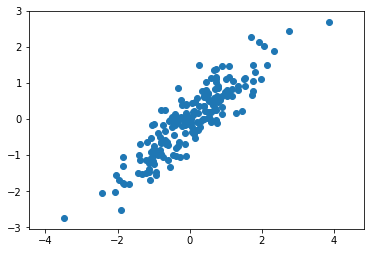

In [15]:
# Generate toy bivariate distribution
rng = np.random.RandomState(42)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

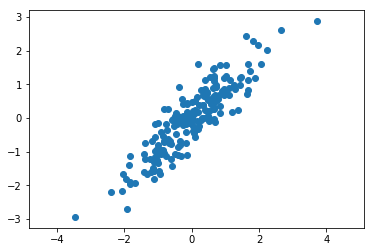

In [16]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

PCA  Step 2: Compute the Covariance Matrix
-------

$$ Σ =   \begin{bmatrix}
Var(x_1) & Cov(x_1, x_2)  \\       
Cov(x_1, x_2)  & Var(x_2) \\
\end{bmatrix} $$


PCA  Step 2: Compute the Covariance Matrix
-------

<center><img src="https://www.riskprep.com/images/stories/portfolio/covar_matrix.gif" width="75%"/></center>

PCA  Step 2: Compute the Covariance Matrix $Σ$
-------

Given that we have standardized the points, the sample covariance matrix is $Σ  = \frac{1}{n} X^t X$  

In [17]:
Σ = (1/X.shape[0]) * np.dot(X.T, X)
Σ 

array([[1.        , 0.89292945],
       [0.89292945, 1.        ]])

In [ ]:
# Double check
np.cov(X, rowvar=0)

<h3>PCA Step 3: Compute the Eigenvectors and Eigenvalues of $Σ$ </h3>

When the eigenvalue are sorted from high-to-low, the eigenvectors are the principal components of $X$.

In [18]:
e_values, e_vectors = np.linalg.eig(Σ)
print("The eigenvectors of Σ  are:")
print(e_vectors,"\n")
print(f"The eigenvalues of Σ  are {e_values}")

The eigenvectors of Σ  are:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] 

The eigenvalues of Σ  are [1.89292945 0.10707055]


Since $Σ$ is a symmetric, it has a full set of $p$ eigenvectors.

Since $Σ$ is non-negative definite,  the eigenvalues are non-negative numbers.

Eigenvectors
-----

Recall that the **eigenvectors** of $Σ$ are vectors $v$ that satisfy a relationship like:

$$ Σ  v = \lambda v $$

The matrix $Σ $ acts as a **scaling** on the vector $v$.

We found the set of eigenvectors $\{\vec{e_i}\}$ of the covariance matrix $Σ  = \frac{1}{n}X^T X$

These satisfy the equation $Σ \vec{e_i} = \lambda_i \vec{e_i}$, where $\lambda_i$ is the variance along the direction defined by $\vec{e_i}$

Concatenating all these eigenvectors into a matrix $E$ gives us the matrix representing a rotation in feature space.

$X$ in our new coordinates is $X' = XE^T$

Our covariance matrix in these new coordinates is 

$Σ' = \frac{1}{n}X'^T X' = \frac{1}{n}(XE^T)^T(XE^T) = \frac{1}{n}EX^TXE^T = EME^T$ 

$Σ' = 
\begin{bmatrix}
\lambda_1 	& 0 	 & \cdots 	  & 0 	\\
0 	& \lambda_2 	 & \cdots 	  & 0 	\\
\vdots 	& \vdots 	 & \ddots & 0 	\\
0 	& 0 & 0 	  & \lambda_p	
\end{bmatrix}
$
 

PCA in scikit-learn
------

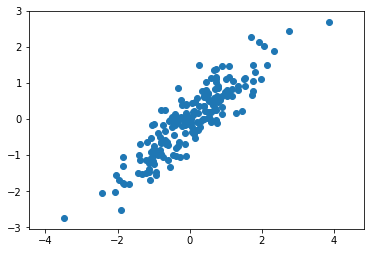

In [37]:
# Generate toy dataset
rng = np.random.RandomState(42)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

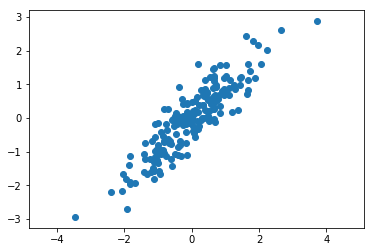

In [20]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [21]:
from sklearn.decomposition import PCA

pca = PCA(2).fit(X)

In [22]:
# These are the eigenvectors
print(pca.components_)

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [24]:
# These are the eigenvalues
print(pca.explained_variance_)

[1.90244165 0.1076086 ]


In [25]:
print(pca.explained_variance_ratio_)

[0.94646472 0.05353528]


In [26]:
print(" Component #1: {:>6.2%} \n Component #2: {:>6.2%}".format(*pca.explained_variance_ratio_))

 Component #1: 94.65% 
 Component #2:  5.35%


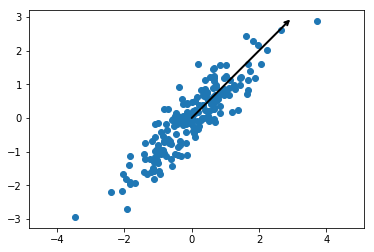

In [29]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1])
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
    break # Plot just the 1st component
plt.axis('equal');

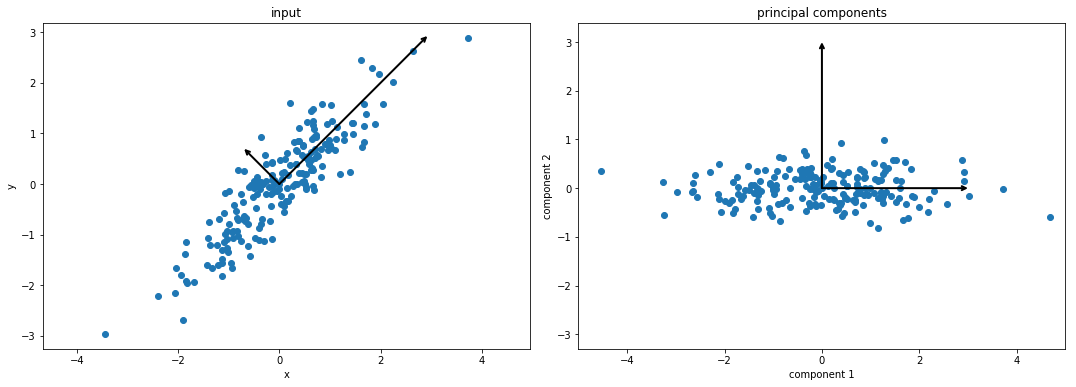

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6)); fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1])
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length); draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal'); ax[0].set(xlabel='x', ylabel='y', title='input');

# plot principal components
X_pca = pca.transform(X); ax[1].scatter(X_pca[:, 0], X_pca[:, 1]); draw_vector([0, 0], [0, 3], ax=ax[1]); draw_vector([0, 0], [3, 0], ax=ax[1]); ax[1].axis('equal');ax[1].set(xlabel='component 1', ylabel='component 2', title='principal components', xlim=(-5, 5), ylim=(-3, 3.1));

Summary Thus Far
-----

- The Principal Components algorithm computes the *eigenvectors* and *eigenvalues* of the covariance matrix $X^t X$.
- Each eigenvector is called a *principal component* of $X$ and represents a direction in feature space.
- Each eigenvalue is the _amount of variance_ along its corresponding eigenvector.
- The matrix of eigenvectors $E$ represents a _rotation matrix_ from the original feature axes into the principal component axes.
- Projecting onto the first $k$ principal components creates the **best k dimensional reconstruction of the data**. 

<center><h2>Questions?</h2></center>

Source: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [31]:
# Let's try it our favorite dataset
from sklearn.datasets import load_iris

# We just need the data (no need for targets)
X = load_iris().data

In [32]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)

In [33]:
results = {}
for n_components in range(1, 5):
    pca = PCA(n_components=n_components, random_state=42)
    pca.fit(X_std);
    results[n_components] = pca

Why does PCA have random state?
-----

Overall, not important.

PCA is a version of SVD. scikit-learn uses a specific SVD solver that can be stochastic.

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [34]:
# Let look at different components
for pca_current in results.values():
    print(pca_current.explained_variance_ratio_)

[0.72962445]
[0.72962445 0.22850762]
[0.72962445 0.22850762 0.03668922]
[0.72962445 0.22850762 0.03668922 0.00517871]


Notice the components are orthogonal.

What is the sum?

In [ ]:
sum(pca_current.explained_variance_ratio_)

Source: https://plot.ly/ipython-notebooks/principal-component-analysis/

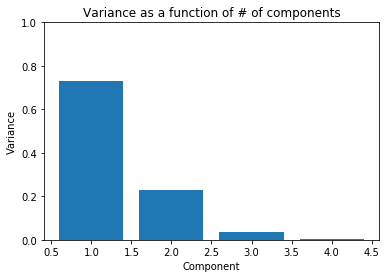

In [35]:
plt.bar(x=[1, 2, 3, 4], height=pca_current.explained_variance_ratio_);
plt.title("Variance as a function of # of components");plt.ylim(top=1);plt.xlabel("Component");plt.ylabel("Variance");

Screeplot: Variance by component
-----
<center><img src="https://i.stack.imgur.com/7Dsnv.png" width="45%"/></center>

Law of diminishing marginal returns. 

How do you pick number of components
-----

1. Look for inflection point (e.g., "elbow" method)
1. Set threshold for % of Variance (e.g., 85% of variance)

Sidebar -  Using eigenvalues > 1
------

> … Those with eigenvalues less than 1.00 are not considered to be stable. They account for less variability than does a single variable and are not retained in the analysis. In this sense, you end up with fewer factors than original number of variables. 

Works best:

- > 250 samples
- > 10-30 features

Girden, E. R. (2001). Evaluating research articles from start to finish. Thousand Oaks, Calif., Sage Publications.

[Source](https://books.google.com/books?id=-3ZsyqzKLQwC&pg=PA157&lpg=PA157&dq=Those+with+eigenvalues+less+than+1.00+are+not+considered+to+be+stable.&source=bl&ots=CaUYqACrMO&sig=er1qRkGtj-TAtJltkYSP7YZU8gQ&hl=en&sa=X&ved=2ahUKEwi0kPaY7f_eAhWp7IMKHcrGDZQQ6AEwAXoECAgQAQ#v=onepage&q=Those%20with%20eigenvalues%20less%20than%201.00%20are%20not%20considered%20to%20be%20stable.&f=false)

Source: 

- https://datascience.stackexchange.com/questions/17216/pca-before-k-mean-clustering/17222
- https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/

### Common Gotcha: Apply PCA both the training set and the test set

In [ ]:
from sklearn.model_selection import train_test_split

iris = load_iris()
X_std = StandardScaler().fit_transform(iris.data)
X_train, X_test, y_train, y_test = train_test_split(X_std, iris.target, random_state=42)

pca = PCA(n_components=2, random_state=42)
pca.fit(X_std); # Entire dataset
X_train_2_components = pca.transform(X_train) # Train
X_test_2_components = pca.transform(X_test)   # Test

Or use just `Pipeline`

Check for understanding: Student Activity
-----

1. Does PCA change the number of observations?

1. Is PCA parametric or non-parametric?

1. What are the weaknesses of PCA?

1. What is the relationship between PCA and Linear Regression?

1. No-It does not change the number of observations you have.  PCA just reduces dimensionality. p goes down. n stays the same

1. PCA is non-parametric. PCA does __not__ make any distributional assumptions in order to extract the Principal Component directions.

1. PCA weakness
    - Manually set or tune number of dimensions.
    - The new principal components are not interpretable. 
    
1. Not much.  PCA is a unsupervised technique that tries to find the best basis to project the data. LR tries to find the linear relationship between dependent and an independent variable.

    They might produce similar results in specific circumstances, but correlation is not mean causation.

Source: https://math.stackexchange.com/questions/684336/connection-between-pca-and-linear-regression

Check for understanding
-----

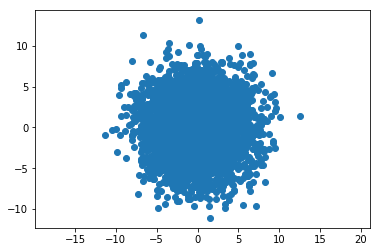

In [40]:
# Sample bivariate distribution
X = np.random.multivariate_normal(mean=np.zeros(2), cov=[[10, 0], [0, 10]], size=5_000)
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

What is the 1st Principle Component for this data?

Unclear - since the data has radial symmetry

Check for understanding
-----

What is the 

Anti-patterns with PCA
------

1. Prevent overfitting by having fewer features 
2. Planning to use PCA from the start 
3. Clustering 

1) Prevent overfitting by having fewer features 
------

Do __not__ use PCA to prevent overfiting.

Use appropriate regularization instead.

PCA might throw away valuable signal, other methods of regularization are weighted by signal.

2) Planning to use PCA from the start 
------

First try to model the raw data. 

If it does not work, then create features with PCA.

3) Clustering
------

PCA does not create clusters.

Use a clustering technique, like k-means.

 Further Study
------

- Non-linear dimensionality reduction
    - Sammon’s Mapping
    - Multidimensional scaling
    - Isomap

 Summary
 ------

 - Dimensionality Reduction techniques compress data to latent features which are easier to model and visualize.
 - PCA finds lower dimensional basis that best captures the variance in the data.
 - PCA steps:
    1. Standardize the data
    2. Compute the Covariance Matrix
    3. Compute the Eigenvectors and Eigenvalues of the Covariance Matrix

Bonus Material
-------

PCA is related to SVD
------

Source: https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

PCA is very different from ICA
-----

Source: https://stats.stackexchange.com/questions/35319/what-is-the-relationship-between-independent-component-analysis-and-factor-analy

Implicitly, PCA assumes a constant (non-stationary) multivariate normal distribution of the data

Source: http://cds.cern.ch/record/104910